In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from matplotlib.ticker import FuncFormatter
import camelot
%matplotlib inline
pd.set_option("display.max_columns", 5000)
pd.set_option("display.max_colwidth", 5000)

# NYPD Motor Vehicle Collisions

Source: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95

My goal is to visualize the answer for those questions: 
- How many accidents happened so far in 2019? 
- How many involved bikes? 
- Where? (Map on QGIS)
- Why?

In [69]:
df_collisions = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,year,fatal
0,07/16/2019,0:00,BRONX,10469,40.873806,-73.852960,"(40.873806, -73.85296)",NaN,NaN,3320 BOSTON ROAD,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4172577,Sedan,NaN,NaN,NaN,NaN,2019,1667
1,07/16/2019,0:00,BROOKLYN,11207,40.655983,-73.897575,"(40.655983, -73.897575)",DE WITT AVENUE,SNEDIKER AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4171390,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2019,1667
2,07/16/2019,0:00,BROOKLYN,11207,40.665592,-73.888504,"(40.665592, -73.888504)",VAN SICLEN AVENUE,LIVONIA AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4171391,Sedan,NaN,NaN,NaN,NaN,2019,1667
3,07/16/2019,0:00,MANHATTAN,10007,40.713690,-74.013760,"(40.71369, -74.01376)",WEST STREET,VESEY STREET,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4171811,Taxi,Bike,NaN,NaN,NaN,2019,1667
4,07/16/2019,0:00,MANHATTAN,10025,40.792126,-73.971780,"(40.792126, -73.97178)",WEST 93 STREET,AMSTERDAM AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4171801,Box Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019,1667


In [74]:
df_collisions.shape

(1535707, 29)

In [75]:
df_collisions.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

1. How many accidents happened so far in 2019?

In [76]:
df_collisions.DATE.str.contains('2019').value_counts()

False    1420316
True      115391
Name: DATE, dtype: int64

In [77]:
year_2019 = (df_collisions.DATE.str.contains('2019').value_counts() == True)

1.1. Where is most common?

In [78]:
df_collisions.BOROUGH.value_counts() #Since 2012

BROOKLYN         332806
QUEENS           284808
MANHATTAN        259778
BRONX            148550
STATEN ISLAND     47478
Name: BOROUGH, dtype: int64

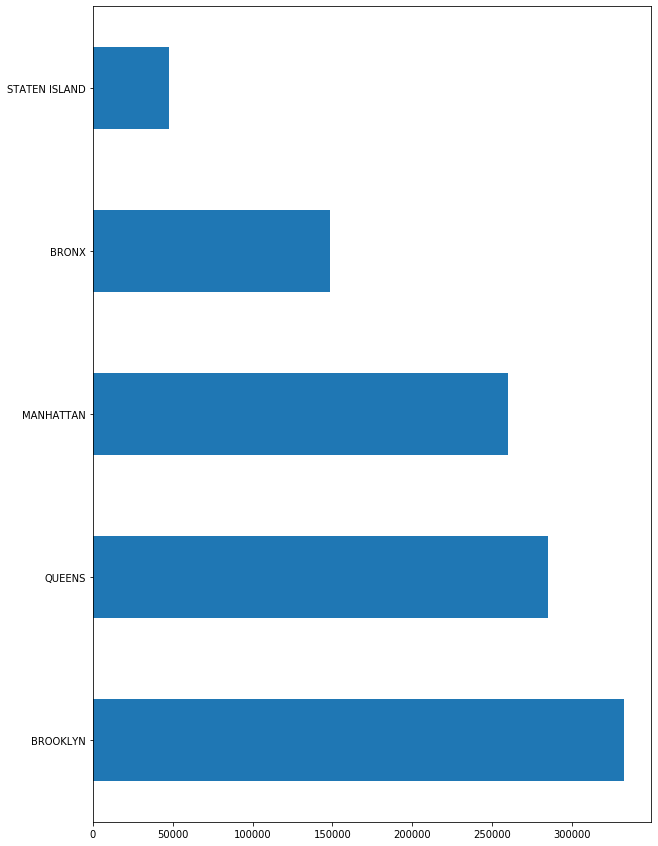

In [8]:
fig1 = df.BOROUGH.value_counts().plot(kind='barh', figsize=(10,15))
plt.savefig("BOROUGH.svg")

In [9]:
df.BOROUGH.value_counts('year_2019') #So far in 2019

BROOKLYN         0.310043
QUEENS           0.265328
MANHATTAN        0.242010
BRONX            0.138389
STATEN ISLAND    0.044231
Name: BOROUGH, dtype: float64

In [10]:
#VEHICLE TYPE CODE 1
#VEHICLE TYPE CODE 2
#VEHICLE TYPE CODE 3
#VEHICLE TYPE CODE 4
#VEHICLE TYPE CODE 5

In [11]:
bikes_one = df['VEHICLE TYPE CODE 1'].str.contains('bike').value_counts()

In [12]:
bikes_two = df['VEHICLE TYPE CODE 2'].str.contains('bike').value_counts()

In [13]:
bikes_three = df['VEHICLE TYPE CODE 3'].str.contains('bike').value_counts()

In [14]:
df['VEHICLE TYPE CODE 4'].str.contains('bike').value_counts()

False    48429
Name: VEHICLE TYPE CODE 4, dtype: int64

In [15]:
df['VEHICLE TYPE CODE 5'].str.contains('bike').value_counts()

False    10362
Name: VEHICLE TYPE CODE 5, dtype: int64

- Creating a new df with only the columns that matter to me 

In [16]:
df_accidents=df[['DATE', 'BOROUGH', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED','NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']]

In [17]:
df_accidents.head()

,DATE,BOROUGH,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,07/16/2019,BRONX,0,0,0,0,0.0,0.0
1,07/16/2019,BROOKLYN,0,0,0,0,0.0,0.0
2,07/16/2019,BROOKLYN,0,0,0,0,0.0,0.0
3,07/16/2019,MANHATTAN,0,0,0,0,0.0,0.0
4,07/16/2019,MANHATTAN,0,0,0,0,0.0,0.0


- Filter only the accidents that happened in 2019

In [18]:
df_accidents['DATE'].astype(str)

0          07/16/2019
1          07/16/2019
2          07/16/2019
3          07/16/2019
4          07/16/2019
5          07/16/2019
6          07/16/2019
7          07/16/2019
8          07/16/2019
9          07/16/2019
10         07/16/2019
11         07/16/2019
12         07/16/2019
13         07/16/2019
14         07/16/2019
15         07/16/2019
16         07/16/2019
17         07/16/2019
18         07/16/2019
19         07/16/2019
20         07/16/2019
21         07/16/2019
22         07/16/2019
23         07/16/2019
24         07/04/2019
25         07/16/2019
26         07/16/2019
27         07/16/2019
28         07/16/2019
29         07/16/2019
              ...    
1535677    07/01/2012
1535678    07/01/2012
1535679    07/01/2012
1535680    07/01/2012
1535681    07/01/2012
1535682    07/01/2012
1535683    07/01/2012
1535684    07/01/2012
1535685    07/01/2012
1535686    07/01/2012
1535687    07/01/2012
1535688    07/01/2012
1535689    07/01/2012
1535690    07/01/2012
1535691   

In [19]:
df_accidents.dtypes

DATE                              object
BOROUGH                           object
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
dtype: object

In [79]:
df_collisions['year'] = pd.DatetimeIndex(df_collisions['DATE']).year
df_collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,year
0,07/16/2019,0:00,BRONX,10469,40.873806,-73.852960,"(40.873806, -73.85296)",NaN,NaN,3320 BOSTON ROAD,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4172577,Sedan,NaN,NaN,NaN,NaN,2019
1,07/16/2019,0:00,BROOKLYN,11207,40.655983,-73.897575,"(40.655983, -73.897575)",DE WITT AVENUE,SNEDIKER AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4171390,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2019
2,07/16/2019,0:00,BROOKLYN,11207,40.665592,-73.888504,"(40.665592, -73.888504)",VAN SICLEN AVENUE,LIVONIA AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4171391,Sedan,NaN,NaN,NaN,NaN,2019
3,07/16/2019,0:00,MANHATTAN,10007,40.713690,-74.013760,"(40.71369, -74.01376)",WEST STREET,VESEY STREET,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4171811,Taxi,Bike,NaN,NaN,NaN,2019
4,07/16/2019,0:00,MANHATTAN,10025,40.792126,-73.971780,"(40.792126, -73.97178)",WEST 93 STREET,AMSTERDAM AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4171801,Box Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019


Only considering the 3 first columns in this category

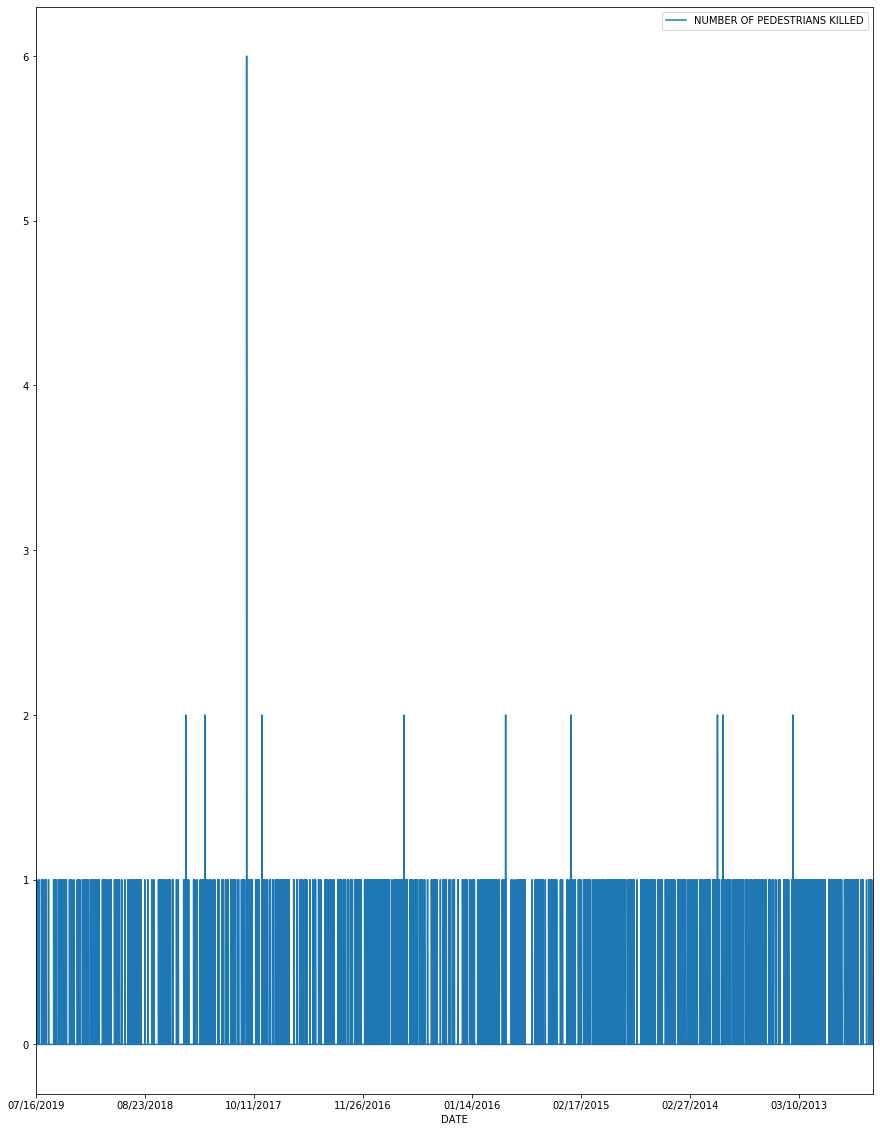

In [21]:
fig1 = df.plot(x='DATE', y='NUMBER OF PEDESTRIANS KILLED', figsize =(15,20))

In [22]:
vehicle = df['VEHICLE TYPE CODE 1'].value_counts()
df['VEHICLE TYPE CODE 1'].value_counts()

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313499
Sedan                                  124904
Station Wagon/Sport Utility Vehicle     99662
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
Taxi                                    12926
LIVERY VEHICLE                          10481
Pick-up Truck                            8326
Box Truck                                6703
MOTORCYCLE                               6536
Bus                                      5578
BICYCLE                                  5568
Bike                                     3258
Tractor Truck Diesel                     3043
TK                                

In [23]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'year'],
      dtype='object')

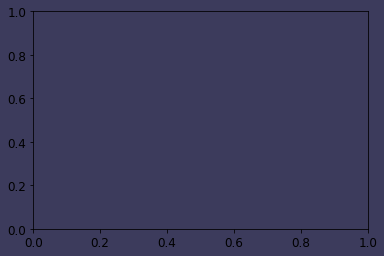

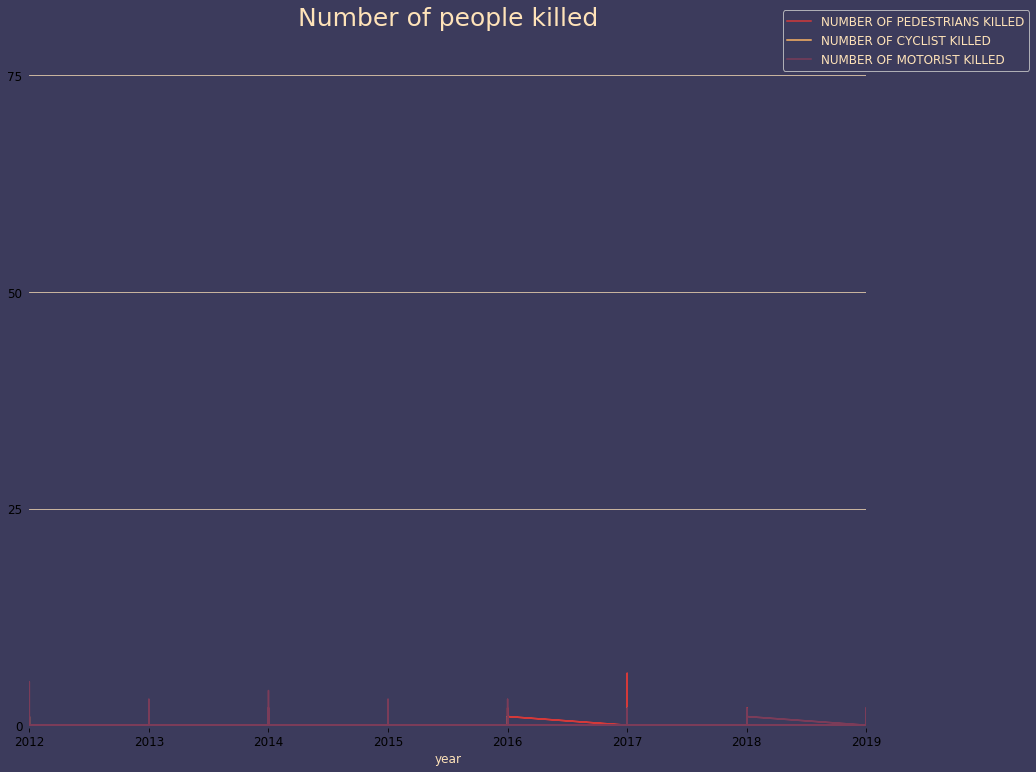

In [35]:

fig, ax = plt.subplots()

ax = df.plot(x='year', y='NUMBER OF PEDESTRIANS KILLED', color='#d53939', legend=True, figsize=(15,12))
df.plot(x='year', y='NUMBER OF CYCLIST KILLED', ax=ax, color='#ffb563', legend=True)
df.plot(x='year', y='NUMBER OF MOTORIST KILLED', ax=ax, color='#7b3c59', legend=True)


plt.title("Number of people killed")
plt.scatter(x,y)
plt.show()




In [62]:
!pip install altair

     |████████████████████████████████| 583kB 6.2MB/s eta 0:00:01
     |████████████████████████████████| 51kB 17.2MB/s eta 0:00:01
  Running setup.py install for toolz ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [64]:
!pip install vega_datasets

     |████████████████████████████████| 215kB 7.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [70]:
import altair as alt
from vega_datasets import data

source = df_collisions

alt.Chart(source).mark_circle(size=60).encode(
    x='NUMBER OF PEDESTRIANS KILLED',
    y='year',
    color='Origin',
    tooltip=['NUMBER OF PEDESTRIANS KILLED', 'year', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF CYCLIST KILLED']
).interactive()

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

Chart({
  data:                DATE   TIME        BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
  0        07/16/2019   0:00          BRONX    10469  40.873806 -73.852960   
  1        07/16/2019   0:00       BROOKLYN    11207  40.655983 -73.897575   
  2        07/16/2019   0:00       BROOKLYN    11207  40.665592 -73.888504   
  3        07/16/2019   0:00      MANHATTAN    10007  40.713690 -74.013760   
  4        07/16/2019   0:00      MANHATTAN    10025  40.792126 -73.971780   
  5        07/16/2019   0:00         QUEENS    11417  40.678140 -73.848850   
  6        07/16/2019   0:00            NaN      NaN  40.826412 -73.940600   
  7        07/16/2019   0:00      MANHATTAN    10032  40.844925 -73.939480   
  8        07/16/2019   0:00            NaN      NaN  40.656307 -73.998680   
  9        07/16/2019   0:01         QUEENS    11370  40.762768 -73.886696   
  10       07/16/2019   0:15         QUEENS    11412  40.704277 -73.749860   
  11       07/16/2019   0:26         QUEENS    113

In [71]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [73]:
source = df_collisions

alt.Chart(source).mark_circle(size=60).encode(
    x='People killed',
    y='year',
    color='NUMBER OF PEDESTRIANS KILLED',
    tooltip=['NUMBER OF PEDESTRIANS KILLED', 'year', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF CYCLIST KILLED']
).interactive()

ValueError: year encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

Chart({
  data:                DATE   TIME        BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
  0        07/16/2019   0:00          BRONX    10469  40.873806 -73.852960   
  1        07/16/2019   0:00       BROOKLYN    11207  40.655983 -73.897575   
  2        07/16/2019   0:00       BROOKLYN    11207  40.665592 -73.888504   
  3        07/16/2019   0:00      MANHATTAN    10007  40.713690 -74.013760   
  4        07/16/2019   0:00      MANHATTAN    10025  40.792126 -73.971780   
  5        07/16/2019   0:00         QUEENS    11417  40.678140 -73.848850   
  6        07/16/2019   0:00            NaN      NaN  40.826412 -73.940600   
  7        07/16/2019   0:00      MANHATTAN    10032  40.844925 -73.939480   
  8        07/16/2019   0:00            NaN      NaN  40.656307 -73.998680   
  9        07/16/2019   0:01         QUEENS    11370  40.762768 -73.886696   
  10       07/16/2019   0:15         QUEENS    11412  40.704277 -73.749860   
  11       07/16/2019   0:26         QUEENS    113